<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Gradient-Descent/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Loading data
data = pd.read_csv('/content/Gredient Descent.csv')

In [6]:
#Checking the data
data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [7]:
#Splitting data into X & y
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

In [8]:
#Creating gradient descent function
def gradient_descent(X, y, slop, intercept, learning_rate, epochs):
  for i in range(epochs):
    y_pred = intercept + slop * X
    derivative_b1 = -(2/len(X))*sum(X*(y-y_pred))
    derivative_b0 = -(2/len(X)*sum(y-y_pred))
    slop = slop - learning_rate*derivative_b1
    intercept = intercept-learning_rate*derivative_b0
    cost = (1/len(X))*sum([val**2 for val in (y-y_pred)])
    print('Iteration={}, slop={}, intercept={}, cost={}'.format(i,slop,intercept,cost))

In [9]:
#Running gradient function for 100 times
gradient_descent(X,y,0,0,0.0001,100)

Iteration=0, slop=[0.7370703], intercept=[0.01454701], cost=[5565.10783449]
Iteration=1, slop=[1.10679545], intercept=[0.02187396], cost=[1484.58655739]
Iteration=2, slop=[1.29225466], intercept=[0.02557922], cost=[457.85425755]
Iteration=3, slop=[1.38528326], intercept=[0.02746779], cost=[199.50998571]
Iteration=4, slop=[1.43194723], intercept=[0.02844507], cost=[134.50591057]
Iteration=5, slop=[1.45535401], intercept=[0.02896524], cost=[118.14969341]
Iteration=6, slop=[1.46709462], intercept=[0.02925611], cost=[114.03414905]
Iteration=7, slop=[1.4729833], intercept=[0.02943197], cost=[112.9985773]
Iteration=8, slop=[1.47593656], intercept=[0.02955013], cost=[112.73798186]
Iteration=9, slop=[1.47741738], intercept=[0.02963935], cost=[112.67238434]
Iteration=10, slop=[1.47815959], intercept=[0.02971405], cost=[112.6558518]
Iteration=11, slop=[1.4785313], intercept=[0.02978147], cost=[112.65166488]
Iteration=12, slop=[1.47871717], intercept=[0.02984523], cost=[112.65058435]
Iteration=13

In [10]:
#Running gradient descent for 1000 times and checking the minimum cost
slop = 0
intercept = 0
learning_rate = 0.0001
epochs = 1000
slop_list = []
intercept_list = []
cost_list = []
for i in range(epochs):
    y_pred = intercept + slop * X
    derivative_b1 = -(2/len(X))*sum(X*(y-y_pred))
    derivative_b0 = -(2/len(X)*sum(y-y_pred))
    slop = slop - learning_rate*derivative_b1
    intercept = intercept-learning_rate*derivative_b0
    cost = (1/len(X))*sum([val**2 for val in (y-y_pred)])
    slop_list.append(slop)
    intercept_list.append(intercept)
    cost_list.append(cost)
    print('Iteration',i,'Cost',cost,'Slop',slop,'Intercept',intercept)

Iteration 0 Cost [5565.10783449] Slop [0.7370703] Intercept [0.01454701]
Iteration 1 Cost [1484.58655739] Slop [1.10679545] Intercept [0.02187396]
Iteration 2 Cost [457.85425755] Slop [1.29225466] Intercept [0.02557922]
Iteration 3 Cost [199.50998571] Slop [1.38528326] Intercept [0.02746779]
Iteration 4 Cost [134.50591057] Slop [1.43194723] Intercept [0.02844507]
Iteration 5 Cost [118.14969341] Slop [1.45535401] Intercept [0.02896524]
Iteration 6 Cost [114.03414905] Slop [1.46709462] Intercept [0.02925611]
Iteration 7 Cost [112.9985773] Slop [1.4729833] Intercept [0.02943197]
Iteration 8 Cost [112.73798186] Slop [1.47593656] Intercept [0.02955013]
Iteration 9 Cost [112.67238434] Slop [1.47741738] Intercept [0.02963935]
Iteration 10 Cost [112.6558518] Slop [1.47815959] Intercept [0.02971405]
Iteration 11 Cost [112.65166488] Slop [1.4785313] Intercept [0.02978147]
Iteration 12 Cost [112.65058435] Slop [1.47871717] Intercept [0.02984523]
Iteration 13 Cost [112.65028543] Slop [1.47880982] 

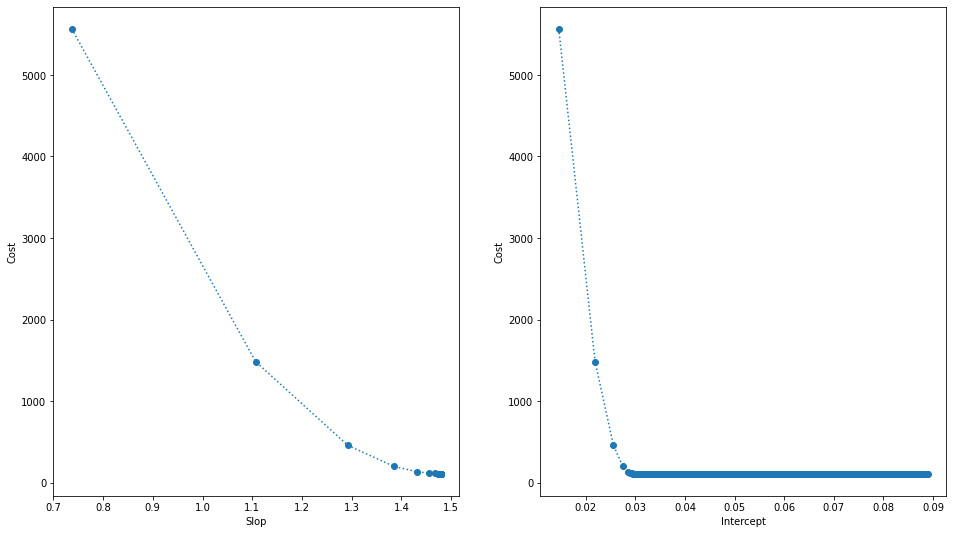

In [11]:
#Visualizing the cost with respect to slope
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(slop_list, cost_list, marker = 'o',linestyle=':');
plt.xlabel('Slop')
plt.ylabel('Cost')
plt.subplot(1,2,2)
plt.plot(intercept_list,cost_list, marker = 'o',linestyle=':');
plt.xlabel('Intercept')
plt.ylabel('Cost')
plt.show()

In [41]:
#Finding minimum cost
Slop = pd.DataFrame(slop_list, columns=['Slop'])
Intercept = pd.DataFrame(intercept_list, columns=['Intercept'])
Cost = pd.DataFrame(cost_list, columns=['Cost'])
gd = pd.concat([Slop, Intercept, Cost], axis=1)
min_cost = gd[gd['Cost']==gd['Cost'].min()]
min_cost

,Slop,Intercept,Cost
999,1.477744,0.088937,112.614846


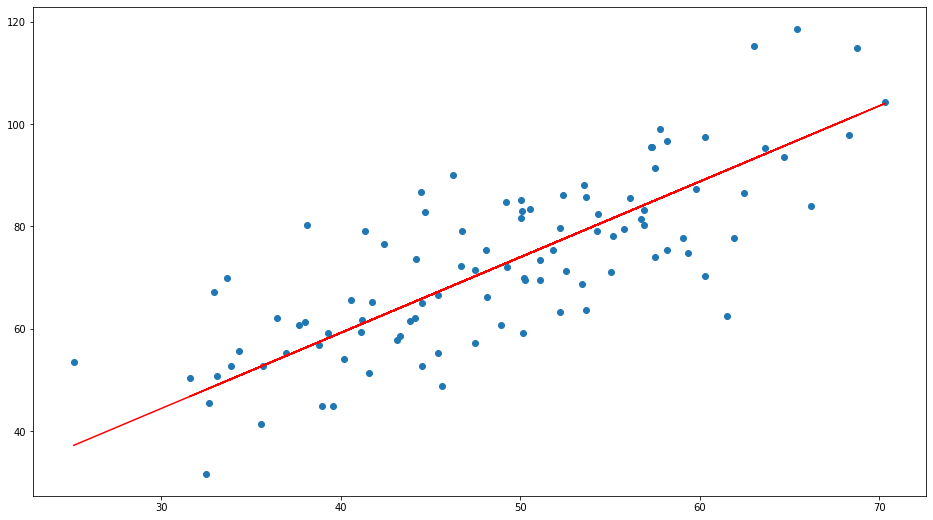

In [56]:
#Visualizing the linear regression with slop & intercept have minimum cost
y_pred = 0.088937 + 1.477744*X

plt.figure(figsize = (16,9))
plt.scatter(X, y);
plt.plot(X,y_pred, color='r');